In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re

In [3]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

In [4]:
load_dotenv('./.env')
POSTGRES_PASS = os.environ.get("POSTGRES_PWD")

In [5]:
engine = create_engine('postgresql://postgres:%s@localhost:5432/movies' % POSTGRES_PASS)

Load in the dataframe

In [6]:
plot_df = pd.read_csv("data/wikipedia_plots/wiki_movie_plots_deduped.csv")
plot_df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [7]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
Release Year        34886 non-null int64
Title               34886 non-null object
Origin/Ethnicity    34886 non-null object
Director            34886 non-null object
Cast                33464 non-null object
Genre               34886 non-null object
Wiki Page           34886 non-null object
Plot                34886 non-null object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [8]:
plot_df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [9]:
plot_df.columns = [
    "release_year",
    "title",
    "origin_ethnicity",
    "director",
    "cast",
    "genre",
    "wiki_page",
    "plot"
]

In [10]:
plot_df.director.value_counts()

Unknown                                    1124
Michael Curtiz                               79
Hanna-Barbera                                77
Lloyd Bacon                                  66
Jules White                                  63
John Ford                                    59
Allan Dwan                                   58
Norman Taurog                                56
William A. Seiter                            56
Richard Thorpe                               55
Mervyn LeRoy                                 54
Raoul Walsh                                  53
Alfred Hitchcock                             53
William Beaudine                             52
K. Raghavendra Rao                           51
Gordon Douglas                               51
Henry Hathaway                               50
K. Balachander                               50
Alfred E. Green                              50
George Marshall                              49
Robert Z. Leonard                       

In [11]:
plot_df.director.replace("Unknown",np.NaN,inplace=True)

In [12]:
plot_df.genre.value_counts()

unknown                                                6083
drama                                                  5964
comedy                                                 4379
horror                                                 1167
action                                                 1098
thriller                                                966
romance                                                 923
western                                                 865
crime                                                   568
adventure                                               526
musical                                                 467
crime drama                                             464
romantic comedy                                         461
science fiction                                         418
film noir                                               345
mystery                                                 310
war                                     

In [13]:
plot_df.genre.replace("unknown",np.NaN,inplace=True)
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
release_year        34886 non-null int64
title               34886 non-null object
origin_ethnicity    34886 non-null object
director            33762 non-null object
cast                33464 non-null object
genre               28803 non-null object
wiki_page           34886 non-null object
plot                34886 non-null object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


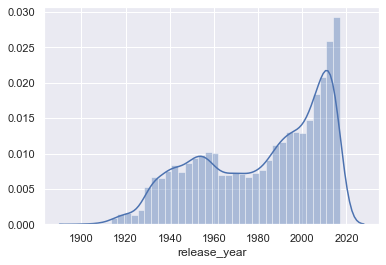

In [14]:
sns.distplot(plot_df.release_year)

In [17]:
# plot_df.to_sql(
#     'movie_plots', 
#     engine,
#     index=False # Not copying over the index
# )

Let's look at some of the summaries

In [18]:
import spacy

In [19]:
nlp = spacy.load("en_core_web_sm")

In [20]:
plot_df.iloc[120]

release_year                                                     1915
title                                                     Inspiration
origin_ethnicity                                             American
director                                          George Foster Platt
cast                                  Audrey Munson, Thomas A. Curran
genre                                                             NaN
wiki_page           https://en.wikipedia.org/wiki/Inspiration_(191...
plot                A young sculptor searches for the perfect mode...
Name: 120, dtype: object

In [21]:
tp = plot_df.iloc[101]
tp_txt = tp['plot']
tp

release_year                                                     1914
title                                                   The Squaw Man
origin_ethnicity                                             American
director                                Oscar Apfel, Cecil B. DeMille
cast                                                    Dustin Farnum
genre                                                         western
wiki_page           https://en.wikipedia.org/wiki/The_Squaw_Man_(1...
plot                James Wynnegate (Dustin Farnum) and his cousin...
Name: 101, dtype: object

In [22]:
doc = nlp(tp_txt)
doc

James Wynnegate (Dustin Farnum) and his cousin, Henry (Monroe Salisbury), are upper class Englishmen and have been made trustees for an orphans’ fund. Henry loses money in a bet at a derby and embezzles money from “the fund” to pay off his debts. When war office officials are informed of the money missing from “the fund," they pursue James, but he successfully escapes to Wyoming. There, James rescues Nat-U-Ritch (Lillian St. Cyr), daughter to the chief of the Utes tribe, from local outlaw Cash Hawkins (William Elmer). Hawkins plans to exact his revenge on James, but has his plans thwarted by Nat-U-Ritch, who fatally shoots him. Later, James gets into an accident in the mountains and needs to be rescued. Nat-U-Ritch tracks him down and carries him back to safety. As she nurses him back to health, they fall in love and later have a child. Meanwhile, during an exploration of the Alps, Henry falls off a cliff. Before he succumbs to his injuries, Henry signs a letter of confession proclaimi

In [23]:
doc.ents

(James Wynnegate,
 Dustin Farnum,
 Henry,
 Monroe Salisbury,
 Englishmen,
 Henry,
 James,
 Wyoming,
 James,
 Nat,
 Lillian,
 Utes,
 Cash Hawkins,
 William Elmer,
 James,
 Nat-U-Ritch,
 James,
 Alps,
 Henry,
 Henry,
 James,
 Henry,
 Lady Diana,
 Winifred Kingston,
 Wyoming,
 James,
 Sheriff,
 Cash Hawkins,
 James,
 Nat-U-Ritch's,
 Nat-U-Ritch,
 Utes,
 James,
 1)

In [24]:
doc.vector

array([-0.22498187,  0.0898938 , -1.1106366 , -1.3725121 ,  0.20101777,
        0.37606487, -0.1448259 , -0.10519708, -0.17854065,  0.17938204,
        0.07436226,  0.76013863,  0.0696234 ,  0.4470736 , -0.14573383,
       -0.46067485,  0.5380429 , -0.16841699, -0.6255136 , -0.18090302,
        0.5478038 , -0.45550346,  0.34622255,  1.398492  ,  0.96764874,
       -0.7158133 , -0.55274886,  0.08362816, -0.86401945,  0.8514878 ,
       -0.73515356, -0.26939443, -0.16902153,  0.37591568,  1.0902311 ,
       -0.34095642,  0.5494355 ,  0.6191072 , -0.27395827,  0.06400035,
       -0.47976866, -0.26144704, -0.43593645, -0.01399255, -0.32823953,
        0.45452008,  0.50272787, -0.4499502 , -0.7376899 , -1.5390447 ,
       -0.34508297,  0.677668  ,  0.01137386, -0.18454416, -0.05211245,
        0.5434166 , -0.361289  ,  1.2476258 ,  1.0636495 , -0.7752956 ,
        0.09493572,  0.23659904,  1.0947372 ,  0.30568454,  0.33564404,
       -0.15623477,  0.04727639, -0.4373317 ,  0.44869456, -0.77

In [25]:
ttoken = doc[0]
ttoken

James

In [26]:
ttoken.pos_

'PROPN'

In [27]:
print("+" + "-"*17 + "+" + "-"*7 + "+")
for e in doc:
    print(f"| %15s | %5s |" % (e, e.pos_))
    print("+" + "-"*17 + "+" + "-"*7 + "+")

+-----------------+-------+
|           James | PROPN |
+-----------------+-------+
|       Wynnegate | PROPN |
+-----------------+-------+
|               ( | PUNCT |
+-----------------+-------+
|          Dustin | PROPN |
+-----------------+-------+
|          Farnum | PROPN |
+-----------------+-------+
|               ) | PUNCT |
+-----------------+-------+
|             and | CCONJ |
+-----------------+-------+
|             his |  PRON |
+-----------------+-------+
|          cousin |  NOUN |
+-----------------+-------+
|               , | PUNCT |
+-----------------+-------+
|           Henry | PROPN |
+-----------------+-------+
|               ( | PUNCT |
+-----------------+-------+
|          Monroe | PROPN |
+-----------------+-------+
|       Salisbury | PROPN |
+-----------------+-------+
|               ) | PUNCT |
+-----------------+-------+
|               , | PUNCT |
+-----------------+-------+
|             are |   AUX |
+-----------------+-------+
|           upper | 

In [28]:
[w for w in doc if not (w.is_stop or w.is_punct)]

[James,
 Wynnegate,
 Dustin,
 Farnum,
 cousin,
 Henry,
 Monroe,
 Salisbury,
 upper,
 class,
 Englishmen,
 trustees,
 orphans,
 fund,
 Henry,
 loses,
 money,
 bet,
 derby,
 embezzles,
 money,
 fund,
 pay,
 debts,
 war,
 office,
 officials,
 informed,
 money,
 missing,
 fund,
 pursue,
 James,
 successfully,
 escapes,
 Wyoming,
 James,
 rescues,
 Nat,
 U,
 Ritch,
 Lillian,
 St.,
 Cyr,
 daughter,
 chief,
 Utes,
 tribe,
 local,
 outlaw,
 Cash,
 Hawkins,
 William,
 Elmer,
 Hawkins,
 plans,
 exact,
 revenge,
 James,
 plans,
 thwarted,
 Nat,
 U,
 Ritch,
 fatally,
 shoots,
 Later,
 James,
 gets,
 accident,
 mountains,
 needs,
 rescued,
 Nat,
 U,
 Ritch,
 tracks,
 carries,
 safety,
 nurses,
 health,
 fall,
 love,
 later,
 child,
 exploration,
 Alps,
 Henry,
 falls,
 cliff,
 succumbs,
 injuries,
 Henry,
 signs,
 letter,
 confession,
 proclaiming,
 James,
 innocence,
 embezzlement,
 Henry,
 widow,
 Lady,
 Diana,
 Winifred,
 Kingston,
 arrive,
 Wyoming,
 tell,
 James,
 news,
 Sheriff,
 recovers,
 m

In [29]:
plot_df.head()

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot
0,1901,Kansas Saloon Smashers,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,NaN,NaN,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [30]:
def sub_pipeline(string,sub_dict,to_lower=False,to_uppper=False,*args,**kwargs):
    if to_lower:
        string = string.lower()
    if to_uppper:
        string = string.upper()
    for k, v in sub_dict.items():
        string = re.sub(k,v,string,*args,**kwargs)
    return string

sub_pipeline(
    tp_txt,
    {
        r"[^\w\s]":" ",
        r"\s+":" ",
        r"(^\s+|\s+$)":""
    },
    to_lower=True,
    flags=re.I
)

'james wynnegate dustin farnum and his cousin henry monroe salisbury are upper class englishmen and have been made trustees for an orphans fund henry loses money in a bet at a derby and embezzles money from the fund to pay off his debts when war office officials are informed of the money missing from the fund they pursue james but he successfully escapes to wyoming there james rescues nat u ritch lillian st cyr daughter to the chief of the utes tribe from local outlaw cash hawkins william elmer hawkins plans to exact his revenge on james but has his plans thwarted by nat u ritch who fatally shoots him later james gets into an accident in the mountains and needs to be rescued nat u ritch tracks him down and carries him back to safety as she nurses him back to health they fall in love and later have a child meanwhile during an exploration of the alps henry falls off a cliff before he succumbs to his injuries henry signs a letter of confession proclaiming james innocence in the embezzleme

In [16]:
from nltk.corpus import stopwords
import nltk

In [111]:
def clean_summary(s,drop_stops=True):
    return sub_pipeline(
        s,
        {r"[^\w\s]":" ",
        r"\s+":" ",
        r"(^\s+|\s+$)":""},
        to_lower=True
    )

In [112]:
plot_df['clean_plot'] = plot_df['plot'].apply(clean_summary)

In [113]:
plot_df.head()

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot,clean_plot
0,1901,Kansas Saloon Smashers,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...
1,1901,Love by the Light of the Moon,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...
2,1901,The Martyred Presidents,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",the film just over a minute long is composed o...
3,1901,"Terrible Teddy, the Grizzly King",American,NaN,NaN,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,the earliest known adaptation of the classic f...


Let's maybe also try to store this in MongoDB

In [17]:
import pymongo

In [18]:
client = pymongo.MongoClient()
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [19]:
list(client.list_databases())

[{'name': 'admin', 'sizeOnDisk': 32768.0, 'empty': False},
 {'name': 'config', 'sizeOnDisk': 73728.0, 'empty': False},
 {'name': 'local', 'sizeOnDisk': 73728.0, 'empty': False},
 {'name': 'movies', 'sizeOnDisk': 8192.0, 'empty': False}]

In [20]:
db = client.movies

In [21]:
list(db.list_collections())

[{'name': 'movies',
  'type': 'collection',
  'options': {},
  'info': {'readOnly': False,
   'uuid': UUID('b51f0bc4-f9f7-4b0e-87c1-80317b4bb91b')},
  'idIndex': {'v': 2,
   'key': {'_id': 1},
   'name': '_id_',
   'ns': 'movies.movies'}}]

In [22]:
movies = db.movies
movies

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'movies'), 'movies')

Let's go on a quick tangent and try out NMF and LDA for our summaries

In [37]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation

In [31]:
doc = nlp(plot_df['plot'][0])
doc

A bartender is working at a saloon, serving drinks to customers. After he fills a stereotypically Irish man's bucket with beer, Carrie Nation and her followers burst inside. They assault the Irish man, pulling his hat over his eyes and then dumping the beer over his head. The group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. The bartender then sprays seltzer water in Nation's face before a group of policemen appear and order everybody to leave.[1]

In [31]:
doc.ents

(James Wynnegate,
 Dustin Farnum,
 Henry,
 Monroe Salisbury,
 Englishmen,
 Henry,
 James,
 Wyoming,
 James,
 Nat,
 Lillian,
 Utes,
 Cash Hawkins,
 William Elmer,
 James,
 Nat-U-Ritch,
 James,
 Alps,
 Henry,
 Henry,
 James,
 Henry,
 Lady Diana,
 Winifred Kingston,
 Wyoming,
 James,
 Sheriff,
 Cash Hawkins,
 James,
 Nat-U-Ritch's,
 Nat-U-Ritch,
 Utes,
 James,
 1)

In [32]:
list(doc.noun_chunks)

[James Wynnegate,
 Dustin Farnum,
 his cousin,
 Henry,
 (Monroe Salisbury,
 upper class Englishmen,
 an orphans’ fund,
 Henry,
 money,
 a bet,
 a derby,
 money,
 the fund,
 his debts,
 war office officials,
 the money,
 the fund,
 they,
 James,
 he,
 Wyoming,
 James,
 Lillian St. Cyr,
 the chief,
 the Utes tribe,
 local outlaw Cash Hawkins,
 William Elmer,
 Hawkins,
 his revenge,
 James,
 his plans,
 Nat-U-Ritch,
 who,
 him,
 James,
 an accident,
 the mountains,
 Nat-U-Ritch,
 him,
 him,
 safety,
 she,
 him,
 health,
 they,
 love,
 a child,
 an exploration,
 the Alps,
 Henry,
 a cliff,
 he,
 his injuries,
 Henry,
 a letter,
 confession,
 James’ innocence,
 the embezzlement,
 Henry's widow,
 Lady Diana,
 Winifred Kingston,
 others,
 Wyoming,
 James,
 the news,
 the Sheriff,
 the murder weapon,
 that,
 Cash Hawkins,
 James,
 Nat-U-Ritch's home,
 their son,
 the couple,
 him,
 them,
 the possibilities,
 both her son,
 her freedom,
 Nat-U-Ritch,
 her own life,
 The movie,
 both the chief,


In [33]:
" ".join(map(str,nlp(plot_df['plot'][0]).ents))

'Irish Carrie Nation Irish Nation'

In [34]:
plot_df['plot_ents'] = plot_df['plot'].apply(lambda p: " ".join(map(str,nlp(p).ents)))
plot_df[['plot','plot_ents']].head()

,plot,plot_ents
0,"A bartender is working at a saloon, serving dr...",Irish Carrie Nation Irish Nation
1,"The moon, painted with a smiling face hangs ov...",night
2,"The film, just over a minute long, is composed...",a minute two first three U.S. Abraham Lincoln ...
3,Lasting just 61 seconds and consisting of two ...,just 61 seconds two first winter Theodore Roos...
4,The earliest known adaptation of the classic f...,Jack Jack Jack Jack Jack Jack Jack Jack Jack


In [104]:
from multiprocessing import Pool

In [108]:
def get_nouns(p):
    return " ".join(map(str,nlp(p).noun_chunks))

with Pool() as p:
    plot_nouns = p.map(get_nouns,plot_df['plot'])
plot_nouns = pd.Series(plot_nouns)

In [109]:
plot_df['plot_nouns'] = plot_nouns
plot_df[['plot','plot_nouns']].head()

,plot,plot_nouns
0,"A bartender is working at a saloon, serving dr...",A bartender a saloon drinks customers he a ste...
1,"The moon, painted with a smiling face hangs ov...",The moon a smiling face a park night A young c...
2,"The film, just over a minute long, is composed...",The film two shots a girl the base an altar to...
3,Lasting just 61 seconds and consisting of two ...,just 61 seconds two shots the first shot a woo...
4,The earliest known adaptation of the classic f...,the classic fairytale this films his cow the b...


In [163]:
cv = CountVectorizer(
    stop_words="english",
    max_df=0.50,
    min_df=0.05,
    max_features=1000
)
cv_text = cv.fit_transform(plot_df['plot'])
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=1000, min_df=0.05,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [164]:
cv.vocabulary_

{'working': 390,
 'man': 223,
 'inside': 169,
 'head': 153,
 'group': 147,
 'begin': 28,
 'water': 381,
 'face': 112,
 'order': 259,
 'leave': 199,
 'night': 252,
 'young': 396,
 'couple': 75,
 'past': 265,
 'learn': 197,
 'look': 213,
 'gets': 135,
 'causing': 56,
 'scene': 306,
 'woman': 387,
 'left': 203,
 'film': 121,
 'just': 179,
 'long': 212,
 'girl': 137,
 'second': 309,
 'shot': 322,
 'runs': 302,
 'set': 317,
 'falls': 115,
 'men': 232,
 'sets': 318,
 'appears': 12,
 'house': 162,
 'takes': 343,
 'taken': 342,
 'known': 186,
 'shows': 323,
 'mother': 240,
 'forced': 129,
 'son': 327,
 'finds': 125,
 'enters': 104,
 'home': 159,
 'escapes': 107,
 'able': 0,
 'killed': 181,
 'reveals': 295,
 'return': 290,
 'follows': 127,
 'large': 189,
 'door': 98,
 'does': 94,
 'try': 362,
 'play': 273,
 'suddenly': 340,
 'use': 369,
 'baby': 25,
 'child': 59,
 'outside': 261,
 'starts': 330,
 'things': 350,
 'turns': 365,
 'party': 264,
 'leaves': 200,
 'invites': 172,
 'join': 177,
 'playi

In [165]:
print("n terms:",len(cv.vocabulary_))
print("n docs: ", len(plot_df))

n terms: 398
n docs:  34886


In [166]:
cv_text.shape

(34886, 398)

In [167]:
cv_text

<34886x398 sparse matrix of type '<class 'numpy.int64'>'
	with 1434557 stored elements in Compressed Sparse Row format>

In [168]:
# nmf = NMF(20)

In [179]:
lda = LatentDirichletAllocation(
    n_components=20,
    n_jobs=-1,
    verbose=2
)
lda_txt = lda.fit_transform(cv_text.T)
lda_txt

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.6s remaining:   13.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.8s finished


iteration: 1 of max_iter: 10


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.7s remaining:   14.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


iteration: 2 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.1s remaining:   12.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.3s finished


iteration: 3 of max_iter: 10


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.5s remaining:   13.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


iteration: 4 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.9s remaining:   11.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


iteration: 5 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.3s remaining:   12.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


iteration: 6 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.2s remaining:   12.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.4s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


iteration: 7 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.6s remaining:   10.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


iteration: 8 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.8s remaining:   11.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


iteration: 9 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.7s remaining:   11.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


iteration: 10 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.0s remaining:    9.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.1s remaining:    9.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.3s finished


array([[1.27648714e-05, 1.27648712e-05, 1.27648713e-05, ...,
        1.27648713e-05, 1.27648712e-05, 1.27648714e-05],
       [1.80635842e-05, 1.80635840e-05, 1.80635842e-05, ...,
        1.80635841e-05, 1.80635840e-05, 1.80635842e-05],
       [1.63505562e-05, 1.63505561e-05, 1.63505562e-05, ...,
        1.63505562e-05, 1.63505561e-05, 1.63505565e-05],
       ...,
       [9.99751569e-01, 1.30753139e-05, 1.30753139e-05, ...,
        1.30753140e-05, 1.30753139e-05, 1.30753139e-05],
       [4.48149155e-06, 4.48149148e-06, 4.48149151e-06, ...,
        6.40726054e-01, 4.48149148e-06, 4.48149152e-06],
       [2.07296854e-05, 2.07296851e-05, 2.07296853e-05, ...,
        2.32519083e-02, 2.07296851e-05, 2.07296853e-05]])

In [180]:
lda_txt.shape

(398, 20)

In [181]:
lda.components_.shape

(20, 34886)

In [182]:
def get_n_argmax(arr,n):
    r, _ = zip(*sorted(enumerate(arr),key=lambda p: p[1], reverse=True))
    return np.array(r[:n])

def get_words(word_dict,ind_arr):
    return [word_dict[i] for i in ind_arr]

In [183]:
reverse_cv_vocab = {v:k for k, v in cv.vocabulary_.items()}

In [184]:
get_words(reverse_cv_vocab,get_n_argmax(lda_txt[0],10))

['appears',
 'accidentally',
 'agrees',
 'attack',
 'arrested',
 'able',
 'army',
 'american',
 'arrive',
 'arrives']

In [185]:
for i in range(lda.n_components):
    print(i, ", ".join(get_words(reverse_cv_vocab,get_n_argmax(lda_txt[i],5))))

# for p in enumerate([reverse_cv_vocab[j] for j in lda_txt.argmax(0)]):
#     print("Category: %2d | Best Word: %s" % p)

0 appears, accidentally, agrees, attack, arrested
1 appears, american, accidentally, able, accident
2 appears, american, agrees, affair, attack
3 appears, accidentally, agrees, american, army
4 appears, accidentally, act, able, american
5 appears, accidentally, agrees, american, arrest
6 appears, american, arrives, agrees, act
7 appears, accidentally, american, arrives, arrest
8 accidentally, agrees, appears, american, arrested
9 able, accidentally, arrives, appears, attack
10 appears, american, agrees, accidentally, army
11 agrees, arrives, appears, able, angry
12 agrees, appears, accidentally, arrives, able
13 able, accidentally, affair, apartment, accident
14 accidentally, agrees, appears, apartment, american
15 accidentally, appears, american, arrest, agrees
16 accidentally, agrees, appears, able, army
17 appears, accidentally, agrees, arrives, able
18 appears, agrees, american, accidentally, army
19 accidentally, able, american, appears, apartment


What if we do TF-IDF and NMF next?

In [176]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=400
)
tfidf_words = tfidf.fit_transform(plot_df['plot'])

In [199]:
print("n documents: %d\nn words:       %d" % tfidf_words.shape)
tfidf_words.shape

n documents: 34886
n words:       400


(34886, 400)

In [195]:
tfidf.get_feature_names()

['000',
 'able',
 'accepts',
 'accident',
 'accidentally',
 'actually',
 'affair',
 'agent',
 'agrees',
 'alive',
 'american',
 'apartment',
 'appears',
 'army',
 'arrested',
 'arrive',
 'arrives',
 'asks',
 'attack',
 'attacked',
 'attacks',
 'attempt',
 'attempts',
 'away',
 'baby',
 'bank',
 'battle',
 'begin',
 'begins',
 'believe',
 'believes',
 'ben',
 'best',
 'big',
 'billy',
 'black',
 'boat',
 'bob',
 'body',
 'book',
 'boss',
 'boy',
 'boyfriend',
 'boys',
 'break',
 'breaks',
 'bring',
 'brings',
 'british',
 'brother',
 'brothers',
 'building',
 'business',
 'called',
 'calls',
 'camp',
 'captain',
 'car',
 'care',
 'case',
 'caught',
 'causing',
 'chance',
 'charlie',
 'chief',
 'child',
 'children',
 'city',
 'close',
 'club',
 'college',
 'come',
 'comes',
 'company',
 'confronts',
 'continues',
 'control',
 'convinces',
 'country',
 'couple',
 'court',
 'crew',
 'crime',
 'dance',
 'daughter',
 'david',
 'day',
 'days',
 'dead',
 'death',
 'decide',
 'decides',
 'despi

In [178]:
tfidf_words

<34886x400 sparse matrix of type '<class 'numpy.float64'>'
	with 1398386 stored elements in Compressed Sparse Row format>

In [192]:
nmf = NMF(
    20
)
nmf_words = nmf.fit_transform(tfidf_words.T)
nmf_words.shape

(400, 20)

In [202]:
nmf_words[:,0].shape

(400,)

In [204]:
nmf_words[:,0].argsort()[::-1][:n_words]

(400,)

In [201]:
words = np.array(tfidf.get_feature_names())

In [216]:
n_words = 10
for i in range(nmf.n_components):
    print(f"Topic {i:2d}: " + ", ".join(words[nmf_words[:,i].argsort()[::-1][:n_words]] ))

Topic  0: house, tells, home, night, day, goes, finds, later, asks, room
Topic  1: love, falls, marriage, marry, married, girl, fall, daughter, sister, college
Topic  2: film, movie, set, life, follows, ends, scene, people, world, end
Topic  3: police, gang, murder, officer, killed, kill, crime, case, kills, killer
Topic  4: war, ship, men, army, group, world, captain, british, crew, american
Topic  5: family, brother, children, sister, house, home, brothers, parents, younger, members
Topic  6: wife, husband, son, child, married, daughter, affair, children, marriage, baby
Topic  7: tom, jerry, mary, george, billy, dog, harry, causing, runs, david
Topic  8: father, mother, son, daughter, boy, child, death, years, parents, old
Topic  9: village, people, comes, city, land, local, girl, raja, small, lives
Topic 10: joe, frank, mary, sam, billy, max, jimmy, mike, boys, harry
Topic 11: money, town, bank, 000, johnny, harry, job, jim, small, local
Topic 12: jack, mary, david, peter, frank, sa

What if we do this with more features?

In [227]:
nmf = NMF(
    50
)
nmf_words = nmf.fit_transform(tfidf_words.T)
nmf_words.shape

(400, 50)

In [228]:
nmf_words[:,0].shape

(400,)

In [229]:
nmf_words[:,0].argsort()[::-1][:n_words]

array([357,  86, 164, 147, 261, 359,  17, 127, 140, 201])

In [230]:
words = np.array(tfidf.get_feature_names())

In [231]:
n_words = 10
for i in range(nmf.n_components):
    print(f"Topic {i:2d}: " + ", ".join(words[nmf_words[:,i].argsort()[::-1][:n_words]] ))

Topic  0: tells, day, home, goes, night, time, asks, finds, gets, later
Topic  1: love, falls, marriage, marry, fall, married, college, wedding, meets, friend
Topic  2: film, movie, set, follows, ends, scene, people, begins, end, relationship
Topic  3: police, officer, car, station, arrested, crime, killed, force, jail, drug
Topic  4: war, world, british, army, american, soldiers, officer, london, country, states
Topic  5: family, home, members, uncle, parents, business, live, land, happy, brothers
Topic  6: wife, husband, affair, married, marriage, couple, having, home, relationship, pregnant
Topic  7: tom, jerry, dog, causing, billy, face, head, runs, water, just
Topic  8: father, parents, marriage, death, home, marry, uncle, refuses, learns, friend
Topic  9: village, people, comes, city, land, local, small, day, lives, chief
Topic 10: young, woman, women, named, boy, wealthy, couple, london, doctor, finds
Topic 11: life, lives, world, movie, living, time, past, old, live, years
Topi

Let's try to clean up the text a little more first

In [259]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/Austin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Austin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [243]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer

<WordNetLemmatizer>

In [256]:
test_words = [
    "tell",
    "running",
    "has",
    "tell",
    "tells",
    "lives",
    "falls"
]

In [255]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [257]:
for word in test_words:
    print("%20s | %20s | %20s" % (word, lemmatizer.lemmatize(word), stemmer.stem(word)))

                tell |                 tell |                 tell
             running |              running |                  run
                 has |                   ha |                  has
                tell |                 tell |                 tell
               tells |                 tell |                 tell
               lives |                 life |                 live
               falls |                 fall |                 fall


In [260]:
nltk.word_tokenize(plot_df['plot'][0])

['A',
 'bartender',
 'is',
 'working',
 'at',
 'a',
 'saloon',
 ',',
 'serving',
 'drinks',
 'to',
 'customers',
 '.',
 'After',
 'he',
 'fills',
 'a',
 'stereotypically',
 'Irish',
 'man',
 "'s",
 'bucket',
 'with',
 'beer',
 ',',
 'Carrie',
 'Nation',
 'and',
 'her',
 'followers',
 'burst',
 'inside',
 '.',
 'They',
 'assault',
 'the',
 'Irish',
 'man',
 ',',
 'pulling',
 'his',
 'hat',
 'over',
 'his',
 'eyes',
 'and',
 'then',
 'dumping',
 'the',
 'beer',
 'over',
 'his',
 'head',
 '.',
 'The',
 'group',
 'then',
 'begin',
 'wrecking',
 'the',
 'bar',
 ',',
 'smashing',
 'the',
 'fixtures',
 ',',
 'mirrors',
 ',',
 'and',
 'breaking',
 'the',
 'cash',
 'register',
 '.',
 'The',
 'bartender',
 'then',
 'sprays',
 'seltzer',
 'water',
 'in',
 'Nation',
 "'s",
 'face',
 'before',
 'a',
 'group',
 'of',
 'policemen',
 'appear',
 'and',
 'order',
 'everybody',
 'to',
 'leave',
 '.',
 '[',
 '1',
 ']']

In [281]:
import string

In [293]:
names_df = pd.read_csv("names.csv")
names_df.name = names_df.name.apply(str.lower)
names_df.head()

,name
0,aaban
1,aabha
2,aabid
3,aabriella
4,aadam


In [362]:
import json

In [363]:
with open("names.json", 'w') as f:
    f.write(json.dumps(names_df.name.tolist()))

In [310]:
class WordCleaner:
    def __init__(self):
        self.stemmer = SnowballStemmer("english")
        self.stop_words = set(nltk.corpus.stopwords.words("english"))
        self.names = set(names_df.name.tolist())
        self.punctuation = set(string.punctuation)
        self.digits = set(string.digits)
        return
    def __call__(self,text):
        return list(self.sent_gen(text))
    def sent_gen(self,text):
        for w in nltk.word_tokenize(text):
            w = "".join(filter(lambda c: not (c in self.punctuation or c in self.digits),w))
            if len(w) == 0: continue
            if w in self.stop_words or w in self.names: 
                continue
            sw = self.stemmer.stem(w)
            if sw in self.stop_words or w in self.names: 
                continue
            yield sw
            
wc = WordCleaner()

In [311]:
wc(plot_df['plot'][0])

['bartend',
 'work',
 'saloon',
 'serv',
 'drink',
 'custom',
 'fill',
 'stereotyp',
 'irish',
 'bucket',
 'beer',
 'carri',
 'nation',
 'follow',
 'burst',
 'insid',
 'assault',
 'irish',
 'pull',
 'hat',
 'eye',
 'dump',
 'beer',
 'head',
 'group',
 'begin',
 'wreck',
 'smash',
 'fixtur',
 'mirror',
 'break',
 'regist',
 'bartend',
 'spray',
 'seltzer',
 'water',
 'nation',
 'face',
 'group',
 'policemen',
 'appear',
 'order',
 'everybodi',
 'leav']

In [312]:
tfidf = TfidfVectorizer(
    tokenizer=wc,
    max_features=500
)
tfidf_plots = tfidf.fit_transform(plot_df['plot'])
tfidf_plots

<34886x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1946378 stored elements in Compressed Sparse Row format>

In [313]:
tfidf_plots.shape

(34886, 500)

In [314]:
words = np.array(tfidf.get_feature_names())

In [315]:
nmf = NMF(
    30
)
nmf_words = nmf.fit_transform(tfidf_plots.T)
nmf_words.shape

(500, 30)

In [316]:
n_words = 10
for i in range(nmf.n_components):
    print(f"Topic {i:2d}: " + ", ".join(words[nmf_words[:,i].argsort()[::-1][:n_words]] ))

Topic  0: tell, leav, ask, home, night, go, say, return, find, next
Topic  1: kill, death, shoot, assassin, gun, dead, attack, die, reveng, wound
Topic  2: villag, peopl, come, citi, land, local, live, form, small, rest
Topic  3: film, movi, charact, end, scene, base, around, plot, follow, action
Topic  4: ’, –, also, come, know, happen, time, toward, plan, peopl
Topic  5: murder, killer, investig, suspect, detect, crime, found, commit, death, bodi
Topic  6: father, die, home, parent, help, death, learn, year, refus, wish
Topic  7: colleg, student, friend, group, fall, parti, one, four, form, best
Topic  8: get, tri, come, start, nt, back, want, help, take, make
Topic  9: school, teacher, student, high, girl, parent, boy, danc, miss, attend
Topic 10: famili, home, member, live, brother, support, uncl, lead, relat, parent
Topic 11: new, becom, work, citi, compani, relationship, live, begin, show, make
Topic 12: gang, member, leader, crimin, bank, join, plan, crime, kidnap, fight
Topic 1

In [326]:
nmf_words = pd.Series(
    [", ".join(words[nmf_words[:,i].argsort()[::-1][:n_words]]) for i in range(nmf.n_components)]
)
nmf_words.head()

0    tell, leav, ask, home, night, go, say, return,...
1    kill, death, shoot, assassin, gun, dead, attac...
2    villag, peopl, come, citi, land, local, live, ...
3    film, movi, charact, end, scene, base, around,...
4    ’, –, also, come, know, happen, time, toward, ...
dtype: object

In [328]:
nmf_labels = pd.Series(
    nmf.components_.argmax(0)
)
nmf_labels.head()

0    16
1    27
2     3
3    20
4    15
dtype: int64

In [330]:
plot_df.head()

,release_year,title,origin_ethnicity,director,cast,genre,wiki_page,plot,plot_ents,plot_nouns
0,1901,Kansas Saloon Smashers,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",Irish Carrie Nation Irish Nation,A bartender a saloon drinks customers he a ste...
1,1901,Love by the Light of the Moon,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",night,The moon a smiling face a park night A young c...
2,1901,The Martyred Presidents,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",a minute two first three U.S. Abraham Lincoln ...,The film two shots a girl the base an altar to...
3,1901,"Terrible Teddy, the Grizzly King",American,NaN,NaN,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,just 61 seconds two first winter Theodore Roos...,just 61 seconds two shots the first shot a woo...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,Jack Jack Jack Jack Jack Jack Jack Jack Jack,the classic fairytale this films his cow the b...


In [357]:
nmf_movies = pd.DataFrame({
    "category": nmf_labels,
    "label": nmf_words.iloc[nmf_labels].reset_index(drop=True),
    "title": plot_df.title,
    "director": plot_df.director,
    "release_year": plot_df.release_year
})[(plot_df.origin_ethnicity == "American") & (plot_df.release_year > 2000)].sort_values("category")
nmf_movies.head()

,category,label,title,director,release_year
17376,0,"tell, leav, ask, home, night, go, say, return,...",Phantom Thread,Paul Thomas Anderson,2017
16020,0,"tell, leav, ask, home, night, go, say, return,...",Everything Must Go,Dan Rush,2011
16013,0,"tell, leav, ask, home, night, go, say, return,...",Don't Be Afraid of the Dark,Troy Nixey,2011
16006,0,"tell, leav, ask, home, night, go, say, return,...",The Debt,John Madden,2011
14411,0,"tell, leav, ask, home, night, go, say, return,...",Birth,Jonathan Glazer,2004


In [358]:
nmf_movies.groupby("category").head(5)

,category,label,title,director,release_year
17376,0,"tell, leav, ask, home, night, go, say, return,...",Phantom Thread,Paul Thomas Anderson,2017
16020,0,"tell, leav, ask, home, night, go, say, return,...",Everything Must Go,Dan Rush,2011
16013,0,"tell, leav, ask, home, night, go, say, return,...",Don't Be Afraid of the Dark,Troy Nixey,2011
16006,0,"tell, leav, ask, home, night, go, say, return,...",The Debt,John Madden,2011
14411,0,"tell, leav, ask, home, night, go, say, return,...",Birth,Jonathan Glazer,2004
15417,1,"kill, death, shoot, assassin, gun, dead, attac...",Defiance,Edward Zwick,2008
17371,1,"kill, death, shoot, assassin, gun, dead, attac...",Bright,David Ayer,2017
13963,1,"kill, death, shoot, assassin, gun, dead, attac...",Swordfish,Dominic Sena,2001
15103,1,"kill, death, shoot, assassin, gun, dead, attac...",Underworld: Evolution,Len Wiseman,2006
17336,1,"kill, death, shoot, assassin, gun, dead, attac...",Jigsaw,The Spierig Brothers,2017
